In [1]:
# Setup dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_covid_counties = '../Outputs/cleaned_covid_counties.csv'
covid_counties = pd.read_csv(csv_covid_counties)
covid_counties

,fips,state,county,population,total cases,total deaths,hospital beds,hospital beds usage,hospital beds covid,hospital icu beds,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
0,2013,AK,Aleutians East Borough,3337,812,0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,2498.0,0.869,0.749,1038.0,0.311,199.0,0.060
1,2016,AK,Aleutians West Census Area,5634,1174,0,0.0,0.0,0.0,0.0,0.0,0.0,4410.0,3637.0,0.783,0.646,1425.0,0.253,500.0,0.089
2,2020,AK,Anchorage Municipality,288000,121792,284,559.0,486.0,12.0,60.0,42.0,1.0,230587.0,205043.0,0.801,0.712,103924.0,0.361,47001.0,0.163
3,2050,AK,Bethel Census Area,18386,13328,0,0.0,0.0,0.0,0.0,0.0,0.0,13690.0,12693.0,0.745,0.690,6688.0,0.364,1806.0,0.098
4,2060,AK,Bristol Bay Borough,836,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,56037,WY,Sweetwater County,42343,12558,21,50.0,26.0,1.0,5.0,4.0,0.0,26324.0,22392.0,0.622,0.529,9680.0,0.229,3926.0,0.093
3219,56039,WY,Teton County,23464,12163,0,48.0,26.0,2.0,6.0,2.0,0.0,26716.0,22802.0,0.950,0.950,11768.0,0.502,5788.0,0.247
3220,56041,WY,Uinta County,20226,6447,0,44.0,4.0,0.0,6.0,0.0,0.0,12818.0,10932.0,0.634,0.540,4696.0,0.232,1998.0,0.099
3221,56043,WY,Washakie County,7805,2775,0,18.0,4.0,1.0,3.0,1.0,0.0,3765.0,3525.0,0.482,0.452,1810.0,0.232,583.0,0.075


In [3]:
#Q3 Which counties have the highest vaccination and infection rates? 
covid_counties_cleaned = covid_counties[['county', 'population', 'total cases', 'vaccination completed']]
covid_counties_cleaned['infection rate (%)'] = round(covid_counties_cleaned['total cases'] / covid_counties_cleaned['population'] * 100, 2)
covid_counties_cleaned['vaccination rate (%)'] = round(covid_counties_cleaned['vaccination completed'] / covid_counties_cleaned['population'] * 100, 2)

covid_counties_cleaned = covid_counties_cleaned[((covid_counties_cleaned['infection rate (%)'] > 0) &
                                               (covid_counties_cleaned['vaccination rate (%)'] > 0)) &
                                               (covid_counties_cleaned['total cases'] <=  covid_counties_cleaned['population']) &
                                               (covid_counties_cleaned['vaccination completed'] <=  covid_counties_cleaned['population'])]

top_ten_min_infection = covid_counties_cleaned.sort_values('infection rate (%)', ascending = True).head(10).reset_index().drop(columns = 'index')
top_ten_min_infection


C:\Users\khang\AppData\Local\Temp\ipykernel_20172\4012257207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_counties_cleaned['infection rate (%)'] = round(covid_counties_cleaned['total cases'] / covid_counties_cleaned['population'] * 100, 2)
C:\Users\khang\AppData\Local\Temp\ipykernel_20172\4012257207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_counties_cleaned['vaccination rate (%)'] = round(covid_counties_cleaned['vaccination completed'] / covid_counties_cleaned['population'] * 10

,county,population,total cases,vaccination completed,infection rate (%),vaccination rate (%)
0,Storey County,4123,205,1038.0,4.97,25.18
1,Sioux County,1166,83,309.0,7.12,26.50
2,Arthur County,463,35,93.0,7.56,20.09
3,Gaines County,21492,1757,4780.0,8.18,22.24
4,Petroleum County,487,46,155.0,9.45,31.83
5,Eureka County,2029,195,570.0,9.61,28.09
6,Slope County,750,74,85.0,9.87,11.33
7,Cherry County,5689,644,2071.0,11.32,36.40
8,San Juan County,17582,2037,15089.0,11.59,85.82
9,Harlan County,3380,407,1397.0,12.04,41.33


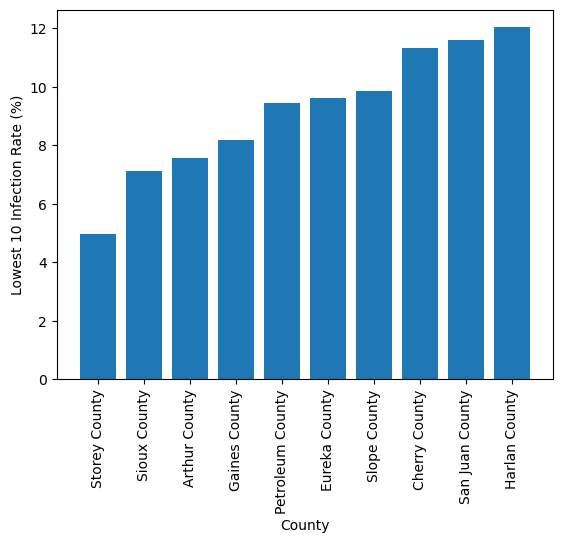

In [4]:
# Set up bar chart for lowest 10 counties by infection rate
x_values = np.arange(len(top_ten_min_infection))
y_values = top_ten_min_infection['infection rate (%)']

tick_loc = [value for value in x_values]

plt.bar(x_values, y_values, align = 'center')
plt.xlabel('County')
plt.ylabel('Lowest 10 Infection Rate (%)')
plt.xticks(tick_loc, top_ten_min_infection['county'], rotation = 'vertical')
plt.savefig('../Outputs/bar_lowest_10_infect_counties.png', bbox_inches = 'tight')
plt.show()

In [5]:
covid_min = top_ten_min_infection.loc[0,:]
covid_min

county                   Storey County
population                        4123
total cases                        205
vaccination completed           1038.0
infection rate (%)                4.97
vaccination rate (%)             25.18
Name: 0, dtype: object

In [6]:
top_ten_max_infection =  covid_counties_cleaned.sort_values('infection rate (%)', ascending = False).head(10).reset_index().drop(columns = 'index')
top_ten_max_infection

,county,population,total cases,vaccination completed,infection rate (%),vaccination rate (%)
0,Northwest Arctic Borough,7621,5873,4816.0,77.06,63.19
1,Nome Census Area,10004,7647,7184.0,76.44,71.81
2,Jim Hogg County,5200,3807,3077.0,73.21,59.17
3,Bethel Census Area,18386,13328,12693.0,72.49,69.04
4,Dimmit County,10124,6246,7205.0,61.69,71.17
5,Perry County,25758,15643,16414.0,60.73,63.72
6,Kusilvak Census Area,8314,5029,5754.0,60.49,69.21
7,Lake and Peninsula Borough,1592,951,974.0,59.74,61.18
8,Dewey County,5892,3511,5015.0,59.59,85.12
9,Crowley County,6061,3564,1358.0,58.80,22.41


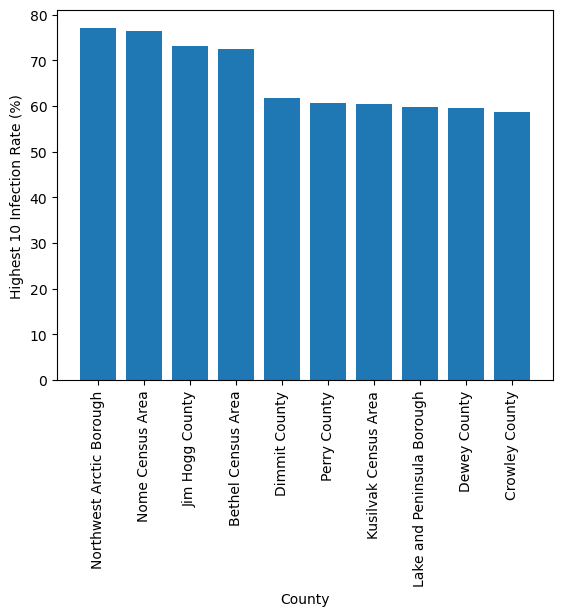

In [7]:
# Set up bar chart for highest 10 counties by infection rate
x_values_max = np.arange(len(top_ten_max_infection))
y_values_max = top_ten_max_infection['infection rate (%)']

tick_loc_max = [value for value in x_values_max]

plt.bar(x_values_max, y_values_max, align = 'center')
plt.xlabel('County')
plt.ylabel('Highest 10 Infection Rate (%)')
plt.xticks(tick_loc_max, top_ten_max_infection['county'], rotation = 'vertical')
plt.savefig('../Outputs/bar_highest_10_infect_counties.png', bbox_inches = 'tight')
plt.show()

In [8]:
covid_max =top_ten_max_infection.iloc[0,:]
covid_max

county                   Northwest Arctic Borough
population                                   7621
total cases                                  5873
vaccination completed                      4816.0
infection rate (%)                          77.06
vaccination rate (%)                        63.19
Name: 0, dtype: object

In [9]:
top_ten_min_vac = covid_counties_cleaned.sort_values('vaccination rate (%)', ascending = True).head(10).reset_index().drop(columns = 'index')
top_ten_min_vac

,county,population,total cases,vaccination completed,infection rate (%),vaccination rate (%)
0,Slope County,750,74,85.0,9.87,11.33
1,McPherson County,494,79,77.0,15.99,15.59
2,Cameron Parish,6973,1399,1287.0,20.06,18.46
3,McCone County,1664,456,308.0,27.40,18.51
4,Holmes County,43960,5944,8196.0,13.52,18.64
5,Harding County,1298,222,255.0,17.10,19.65
6,Garfield County,1258,251,251.0,19.95,19.95
7,Arthur County,463,35,93.0,7.56,20.09
8,Grant County,623,114,136.0,18.30,21.83
9,King County,272,60,60.0,22.06,22.06


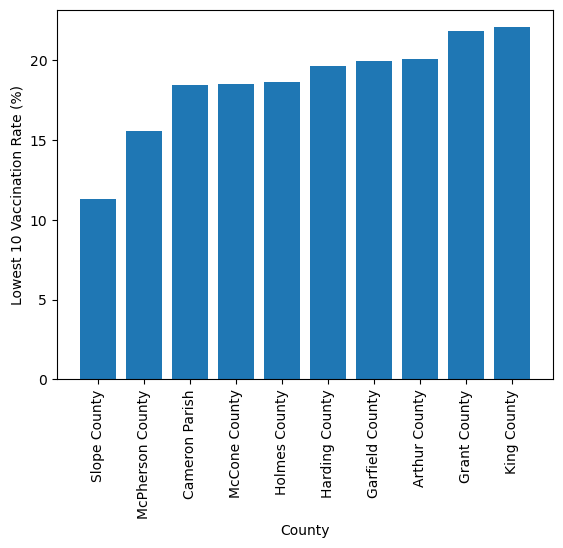

In [10]:
# Set up bar chart for lowest 10 counties by vaccination rate
x_values = np.arange(len(top_ten_min_vac))
y_values = top_ten_min_vac['vaccination rate (%)']

tick_loc = [value for value in x_values]

plt.bar(x_values, y_values, align = 'center')
plt.xlabel('County')
plt.ylabel('Lowest 10 Vaccination Rate (%)')
plt.xticks(tick_loc, top_ten_min_vac['county'], rotation = 'vertical')
plt.savefig('../Outputs/bar_lowest_10_vacrate_counties.png', bbox_inches = 'tight')
plt.show()

In [11]:
vac_min = top_ten_min_vac.iloc[0,:]
vac_min                  

county                   Slope County
population                        750
total cases                        74
vaccination completed            85.0
infection rate (%)               9.87
vaccination rate (%)            11.33
Name: 0, dtype: object

In [12]:
top_ten_max_vac = covid_counties_cleaned.sort_values('vaccination rate (%)', ascending = False).head(10).reset_index().drop(columns = 'index')
top_ten_max_vac

,county,population,total cases,vaccination completed,infection rate (%),vaccination rate (%)
0,Norfolk city,242742,54373,242398.0,22.40,99.86
1,San Juan County,728,322,717.0,44.23,98.49
2,Teton County,23464,12163,22802.0,51.84,97.18
3,Lares Municipio,24276,11517,23404.0,47.44,96.41
4,Presidio County,6704,1274,6449.0,19.00,96.20
5,Big Horn County,13319,5891,12531.0,44.23,94.08
6,Montgomery County,1050688,248515,987998.0,23.65,94.03
7,Bayamón Municipio,169269,67557,158677.0,39.91,93.74
8,Aibonito Municipio,22108,8571,20645.0,38.77,93.38
9,New York County,1628706,600283,1520729.0,36.86,93.37


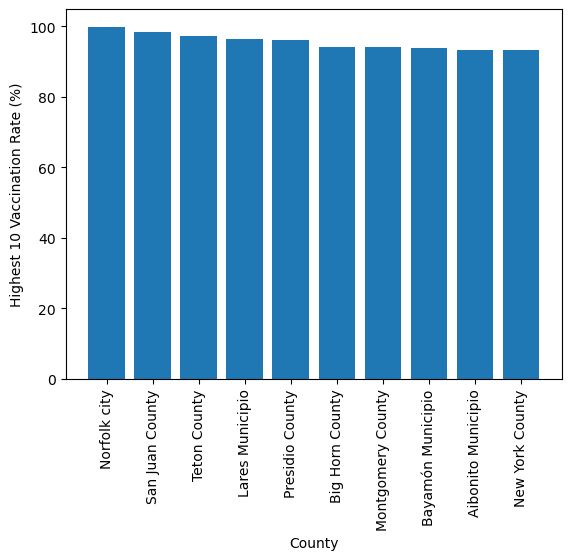

In [13]:
# Set up bar chart for highest 10 counties by vaccination rate
x_values = np.arange(len(top_ten_max_vac))
y_values = top_ten_max_vac['vaccination rate (%)']

tick_loc = [value for value in x_values]

plt.bar(x_values, y_values, align = 'center')
plt.xlabel('County')
plt.ylabel('Highest 10 Vaccination Rate (%)')
plt.xticks(tick_loc, top_ten_max_vac['county'], rotation = 'vertical')
plt.savefig('../Outputs/bar_highest_10_vacrate_counties.png', bbox_inches = 'tight')
plt.show()

In [14]:
vac_max = top_ten_max_vac.iloc[0,:]
vac_max

county                   Norfolk city
population                     242742
total cases                     54373
vaccination completed        242398.0
infection rate (%)               22.4
vaccination rate (%)            99.86
Name: 0, dtype: object